Plot the locations of the profiles for the different regions. 

In [1]:
import os
import glob
import netCDF4
import logging
import numpy as np
import emodnetchemistry
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [4]:
logger = logging.getLogger("EMODnet-Chemistry-Data-positions")
logger.setLevel(logging.DEBUG)
logging.info("Starting")

## Paths

In [5]:
datadir = "/data/EMODnet/Eutrophication/Split/"
figdir = "/home/ctroupin/dox/EMODnet-Chemistry/Data-locations/"
if not os.path.exists(figdir):
    os.makedirs(figdir)

varlist = ["phosphate", "silicate", "ammonium", "chlorophyll-a", 
           "dissolved_inorganic_nitrogen", "dissolved_oxygen"]

### Domains

In [6]:
arctic = emodnetchemistry.Region(-44.25, 70.0, 56.5, 83.0, 0.25, 0.125, "Arctic Sea")
neatlantic = emodnetchemistry.Region(-42.0, -0.1, 24.9, 48.0, 0.1, 0.1, "North-East Atlantic Ocean")
balticsea = emodnetchemistry.Region(9.4, 30.9, 53.0, 65.9, 0.1, 0.1, "Baltic Sea")
blacksea = emodnetchemistry.Region(26.5, 41.95, 40.0, 47.95, 0.05, 0.05, "Black Sea")
mediterranean = emodnetchemistry.Region(-7.0, 36.375, 30.0, 45.875, 0.125, 0.125, "Mediterranean Sea")
northsea = emodnetchemistry.Region(-5.4, 13.0, 47.9, 62.0, 0.1, 0.1, "North Sea")
regionlist = [arctic, blacksea, balticsea, mediterranean, neatlantic, northsea]

In [17]:
regiondict = {"ArcticSea": arctic, "Atlantic": neatlantic, "BalticSea": balticsea, 
              "BlackSea": blacksea, "MedSea2": mediterranean, "NorthSea": northsea}

## Make plot
Define projection

In [10]:
m = Basemap(projection='ortho', lon_0=5., lat_0=50, resolution='i')

## Loop on variables

INFO:EMODnet-Chemistry-Data-positions:Working on variable phosphate
INFO:EMODnet-Chemistry-Data-positions:Working on 9 files
INFO:EMODnet-Chemistry-Data-positions:Saving figure as /home/ctroupin/dox/EMODnet-Chemistry/Data-locations/EMODnet_hexbin_phosphate.png


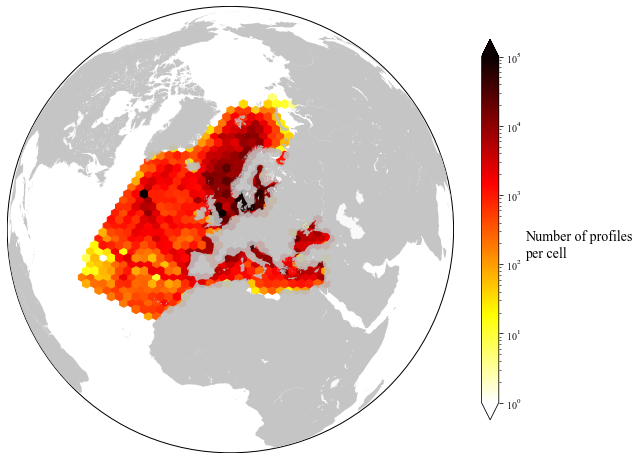

INFO:EMODnet-Chemistry-Data-positions:Working on variable silicate
INFO:EMODnet-Chemistry-Data-positions:Working on 9 files
INFO:EMODnet-Chemistry-Data-positions:Saving figure as /home/ctroupin/dox/EMODnet-Chemistry/Data-locations/EMODnet_hexbin_silicate.png


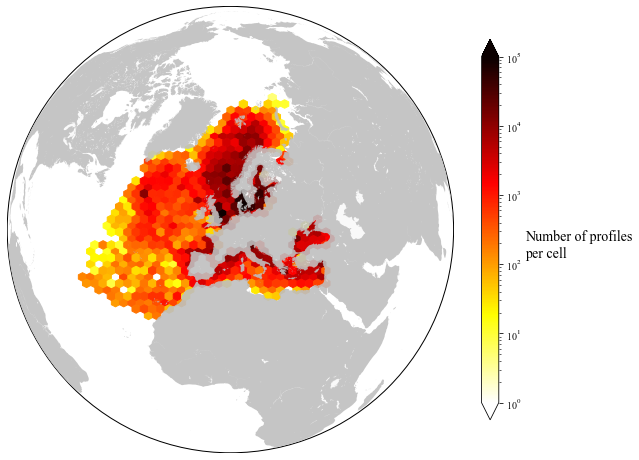

INFO:EMODnet-Chemistry-Data-positions:Working on variable ammonium
INFO:EMODnet-Chemistry-Data-positions:Working on 9 files
INFO:EMODnet-Chemistry-Data-positions:Saving figure as /home/ctroupin/dox/EMODnet-Chemistry/Data-locations/EMODnet_hexbin_ammonium.png


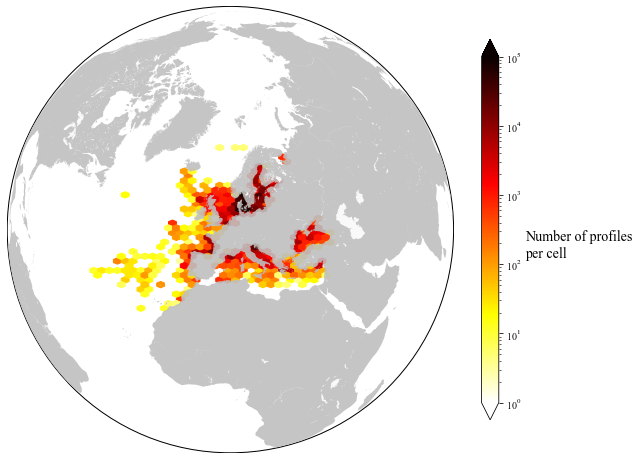

INFO:EMODnet-Chemistry-Data-positions:Working on variable chlorophyll-a
INFO:EMODnet-Chemistry-Data-positions:Working on 8 files
INFO:EMODnet-Chemistry-Data-positions:Saving figure as /home/ctroupin/dox/EMODnet-Chemistry/Data-locations/EMODnet_hexbin_chlorophyll-a.png


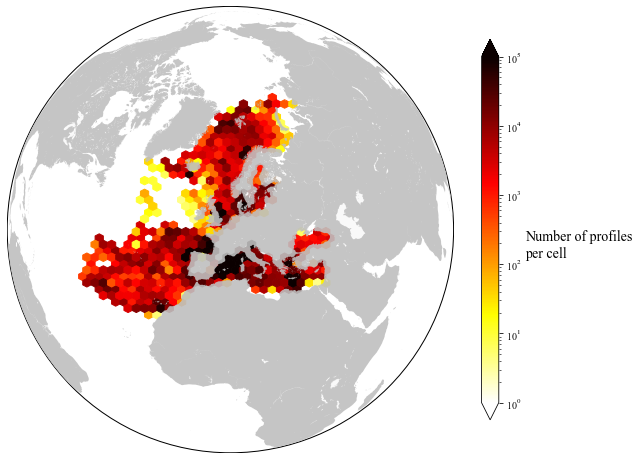

INFO:EMODnet-Chemistry-Data-positions:Working on variable dissolved_inorganic_nitrogen
INFO:EMODnet-Chemistry-Data-positions:Working on 9 files
INFO:EMODnet-Chemistry-Data-positions:Saving figure as /home/ctroupin/dox/EMODnet-Chemistry/Data-locations/EMODnet_hexbin_dissolved_inorganic_nitrogen.png


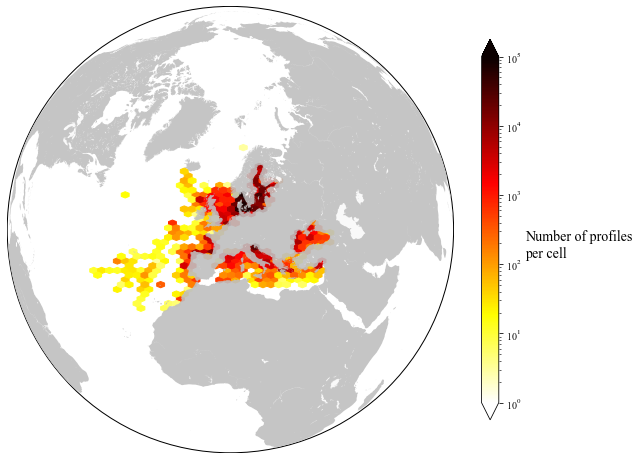

INFO:EMODnet-Chemistry-Data-positions:Working on variable dissolved_oxygen
INFO:EMODnet-Chemistry-Data-positions:Working on 8 files
INFO:EMODnet-Chemistry-Data-positions:Saving figure as /home/ctroupin/dox/EMODnet-Chemistry/Data-locations/EMODnet_hexbin_dissolved_oxygen.png


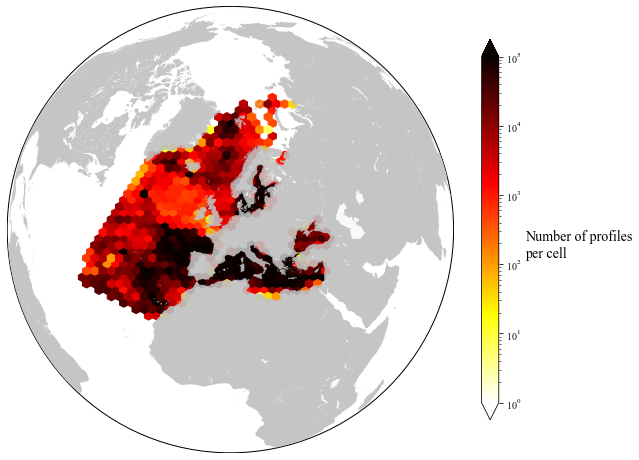

In [24]:
for varname in varlist:
    logger.info("Working on variable {}".format(varname))
    datafilelist = sorted(glob.glob(os.path.join(datadir, f"*{varname}*.nc")))
    nfiles = len(datafilelist)
    logger.info("Working on {} files".format(nfiles))
    
    #figname = os.path.join(figdir, f"EMODnet_data_domains_{varname}.png")
    #logger.info("Saving figure as {}".format(figname))
    #plot_data_locations(datafilelist, figname)
    
    figname = os.path.join(figdir, f"EMODnet_hexbin_{varname}.png")
    logger.info("Saving figure as {}".format(figname))
    plot_hexbin_datalocations(datafilelist, figname)

### Simple dot plot

In [9]:
colorlist = {"ArcticSea": "#1f77b4", "Atlantic": "#ff7f0e", 
             "BalticSea": "#2ca02c", "BlackSea": "#d62728", 
             "MedSea2": "#9467bd", "NorthSea": "#8c564b"}

In [21]:
def plot_data_locations(datafilelist, figname=None):

    fig = plt.figure(figsize=(12, 12))
    regionkeyold = ""
    for datafile in datafilelist:
        regionkey = os.path.basename(datafile).split("_")[0]
        region = regiondict[regionkey]
        region.get_data_coords(datafile)

        col = colorlist[regionkey]
        pp = m.plot(region.londata, region.latdata, "o", color=col, ms=.03, latlon=True)

        if regionkey != regionkeyold:
            m.plot(5., 51., "o", ms=5, color=col, markerfacecolor=col, latlon=True, label=region.name)

        regionkeyold = regionkey

    m.plot(5., 51., "o", ms=6, color=".75", markerfacecolor=".75", latlon=True, zorder=4)
    m.fillcontinents(color=".75")
    plt.legend(fontsize=14, loc=3)
    plt.title(f"Observations of sea water {varname} concentration", fontsize=20)
    if figname is not None:
        plt.savefig(figname, dpi=300, bbox_inches="tight", transparent=False)
    plt.close()

In [23]:
def plot_hexbin_datalocations(datafilelist, figname=None):
    fig = plt.figure(figsize=(10, 10))
    lonall = np.array([])
    latall = np.array([])
    for datafile in datafilelist:
        with netCDF4.Dataset(datafile, "r") as nc:
            lon = nc.get_variables_by_attributes(standard_name="longitude")[0][:]
            lat = nc.get_variables_by_attributes(standard_name="latitude")[0][:]
        # m.plot(lon, lat, "wo", ms=.03, latlon=True, zorder=4)
        llon, llat = m(lon, lat)
        lonall = np.append(lonall, llon)
        latall = np.append(latall, llat)

    m.hexbin(lonall, latall, bins="log", vmin=1, vmax=100000,
             mincnt=3, gridsize=30, zorder=3, cmap=plt.cm.hot_r)
    m.fillcontinents(color=".75", zorder=5, alpha=.9)
    cb = plt.colorbar(shrink=.7, extend="both")
    #cb.set_ticks([1., 2., 3., 4., 5.])
    #cb.set_ticklabels(["10", "100", "1000", "10000", "100000"])
    cb.set_label("Number of profiles\nper cell", fontsize=14, rotation=0, ha="left")
    if figname is not None:
        plt.savefig(figname, dpi=300, bbox_inches="tight", transparent=False)
    plt.show()
    plt.close()

### Data location and domains

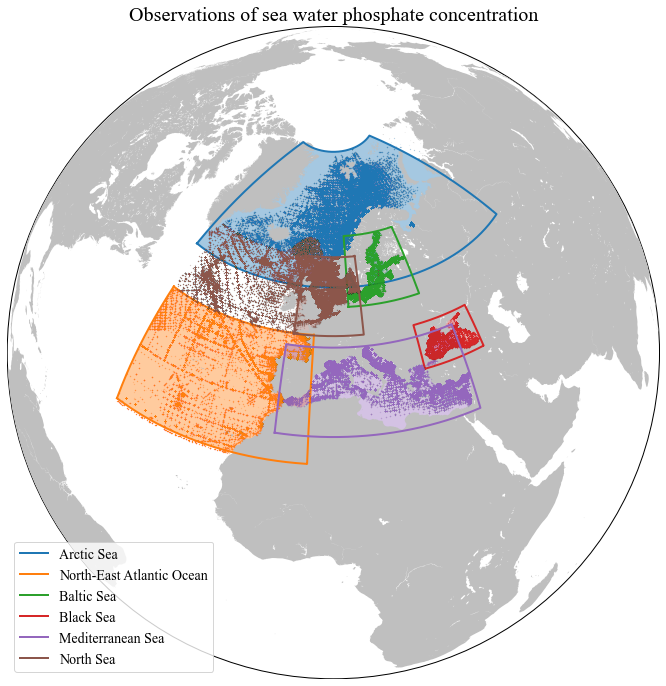

In [26]:
fig = plt.figure(figsize=(12, 12))
ax = plt.subplot(111)

regionkeyold = ""
for datafile in datafilelist:
    regionkey = os.path.basename(datafile).split("_")[0]
    region = regiondict[regionkey]
    region.get_data_coords(datafile)
    
    col = colorlist[regionkey]
    pp = m.plot(region.londata, region.latdata, "o", color=col, ms=.03, latlon=True)
    
    if regionkey != regionkeyold:
        
        # Get rectangle of products
        region.get_rect_coords()
        region.get_rect_patch(m, facecolor=col, alpha=0.4)

        m.plot(region.lonvector, region.latvector, color=col, 
               latlon=True, label=region.name, linewidth=2)
        ax.add_patch(region.rect)
        
    regionkeyold = regionkey

m.plot(5., 51., "o", ms=6, color=".75", markerfacecolor=".75", latlon=True, zorder=4)
m.fillcontinents(color=".75")
plt.legend(fontsize=14, loc=3)
plt.title("Observations of sea water phosphate concentration", fontsize=20)
#plt.savefig(os.path.join(figdir, "EMODnet_data_domains2_phosph.png"), dpi=300, bbox_inches="tight")
plt.show()
plt.close()

### Hexbin plot

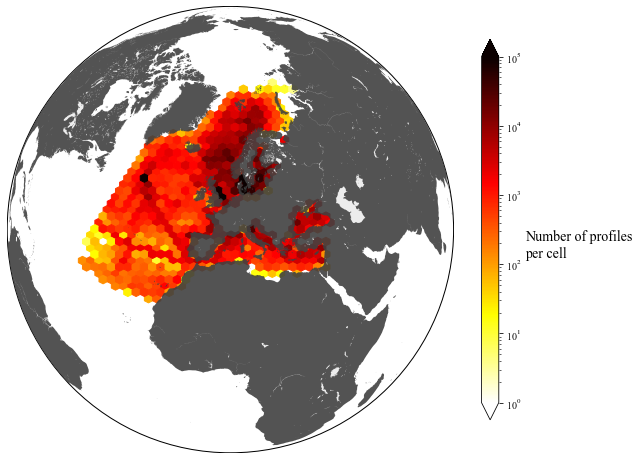